In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.2f}'.format
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\user\Documents\healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


<Axes: >

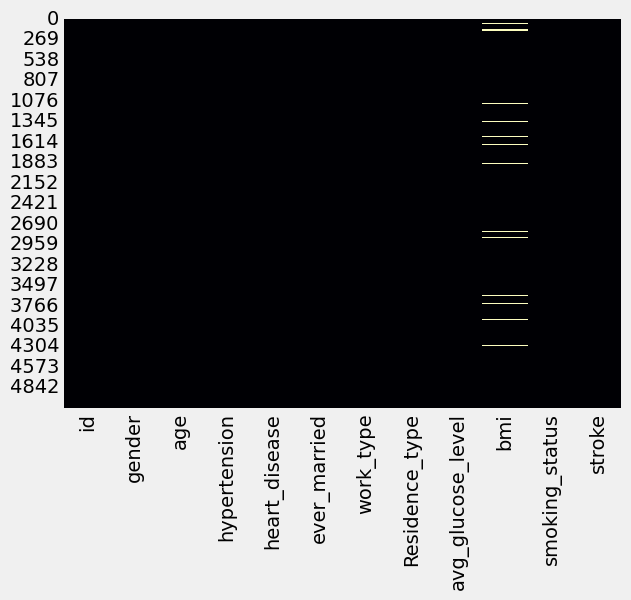

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

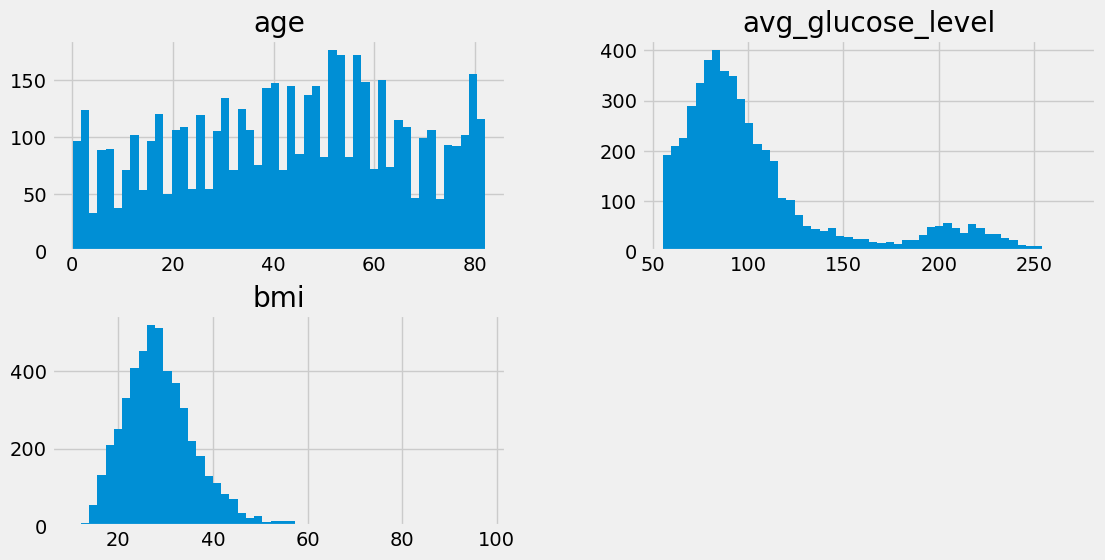

In [7]:
attributes = ['age', 'avg_glucose_level','bmi']
data[attributes].hist(bins=50,figsize=(12,6))

Data distribution for age has dominant values around : 10, 60 & 80.

avg_glucose_level has 2 peaks of uneven heights present at values around : 100 & 200.

bmi has a near about normal distribution but it has values in low numbers towards the right side!

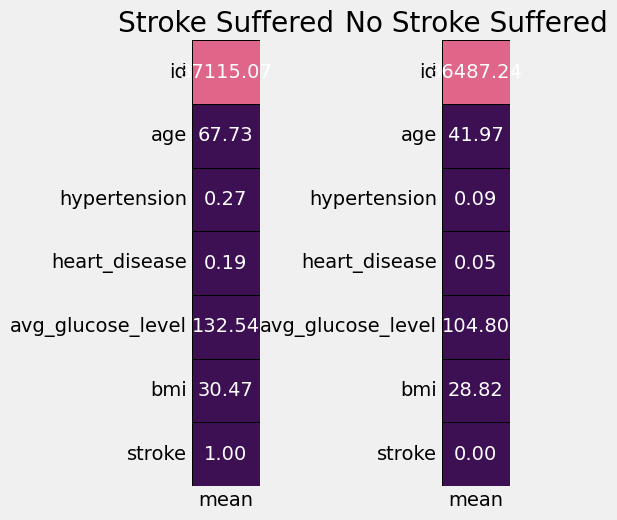

In [8]:
stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

Mean values of all the features for cases of stroke suffered and no stroke suffered.

age and avg_glucose_level can be solid 1st hand indicators to identify a stroke.

Mean age values of patients that suffered a stroke, 67.73,is much higher than those did not suffer a stroke, 41.97.

Similarly, avg_glucose_level value of 132.54 can indicate a higher chance of suffering from stroke than the avg_glucose_level value of 104.80 that has been found in patients that did not suffer a stroke.

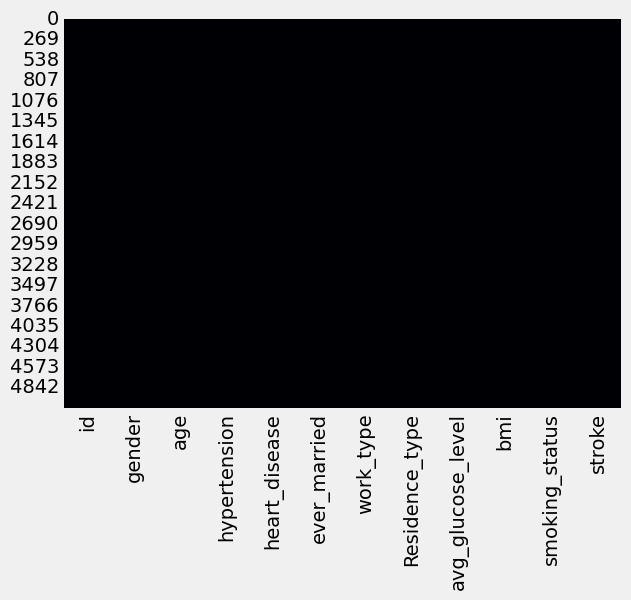

In [9]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

How many of the people in the data had a stroke before? Check the label?

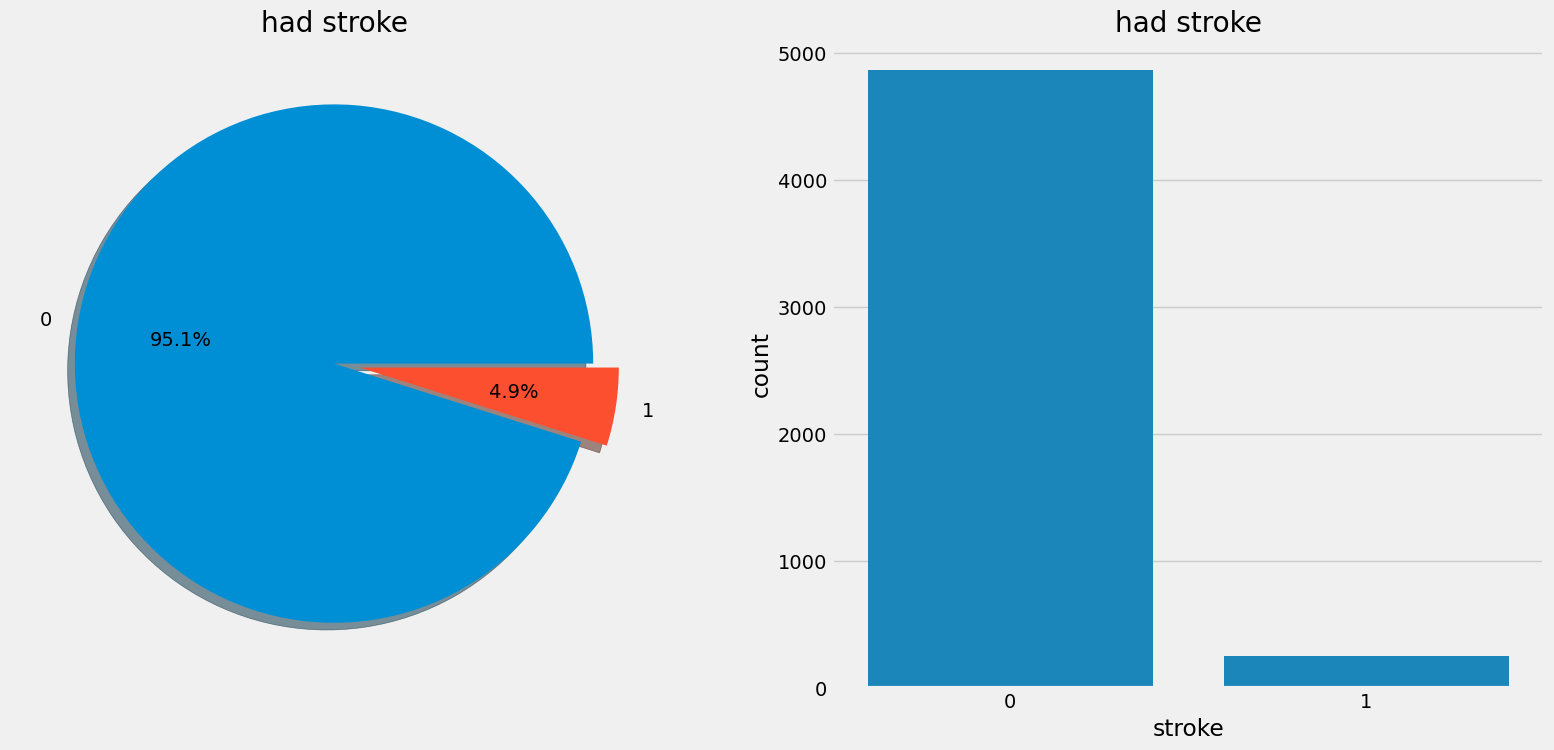

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('had stroke')
ax[0].set_ylabel('')
sns.countplot(x='stroke', data=data ,ax=ax[1])
ax[1].set_title('had stroke')
plt.show()

Clearly, the dataset is unbalanced in the favour of no stroke.

19 : 1 ratio is observed for No Stroke : Stroke!

Thus, due to such heavy bias towards cases of No Stroke, predictions cannot be trusted!

In [11]:
data.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

In [12]:
print(data.dtypes)
data['gender'].unique()
data['stroke'].unique()

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


array([1, 0], dtype=int64)

In [13]:
data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

data['age'] = data['age'].astype(int)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


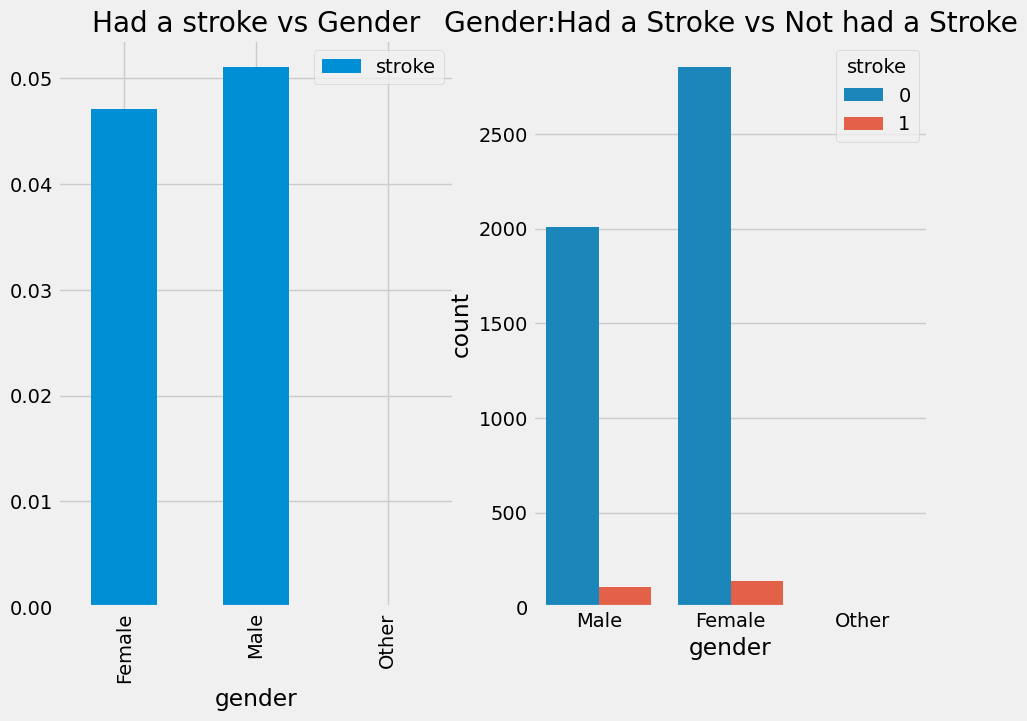

In [14]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['gender','stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Gender')
sns.countplot(x='gender',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('Gender:Had a Stroke vs Not had a Stroke')
plt.show()

In [15]:
data.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64

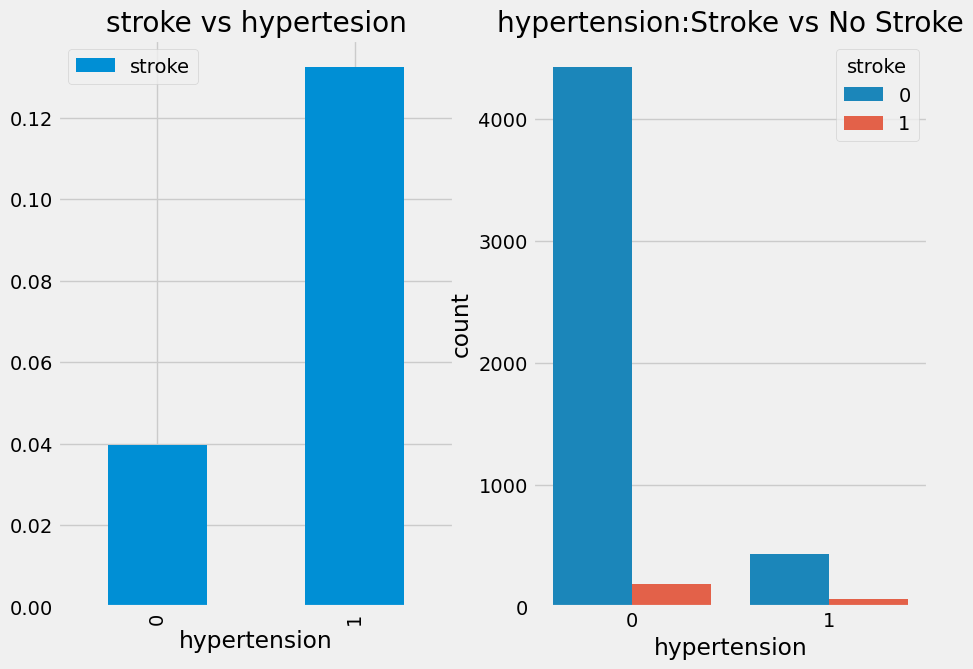

In [16]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['hypertension','stroke']].groupby(['hypertension']).mean().plot.bar(ax=ax[0])
ax[0].set_title('stroke vs hypertesion')

sns.countplot(x ='hypertension',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('hypertension:Stroke vs No Stroke')
plt.show()

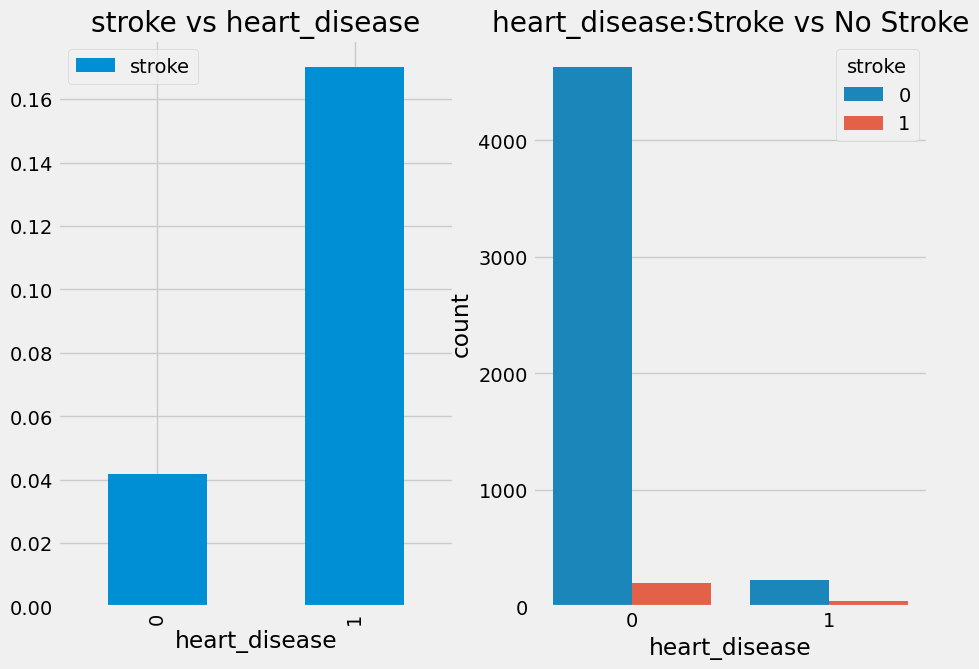

In [17]:
fig,ax = plt.subplots(1,2, figsize=(10,7))
data[['heart_disease', 'stroke']].groupby(['heart_disease']).mean().plot.bar(ax=ax[0])
ax[0].set_title('stroke vs heart_disease')
sns.countplot(x='heart_disease',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('heart_disease:Stroke vs No Stroke')
plt.show()

In [18]:
pd.crosstab(data.smoking_status,data.stroke
            ,margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
smoking_status,,,
Unknown,1497,47,1544
formerly smoked,815,70,885
never smoked,1802,90,1892
smokes,747,42,789
All,4861,249,5110


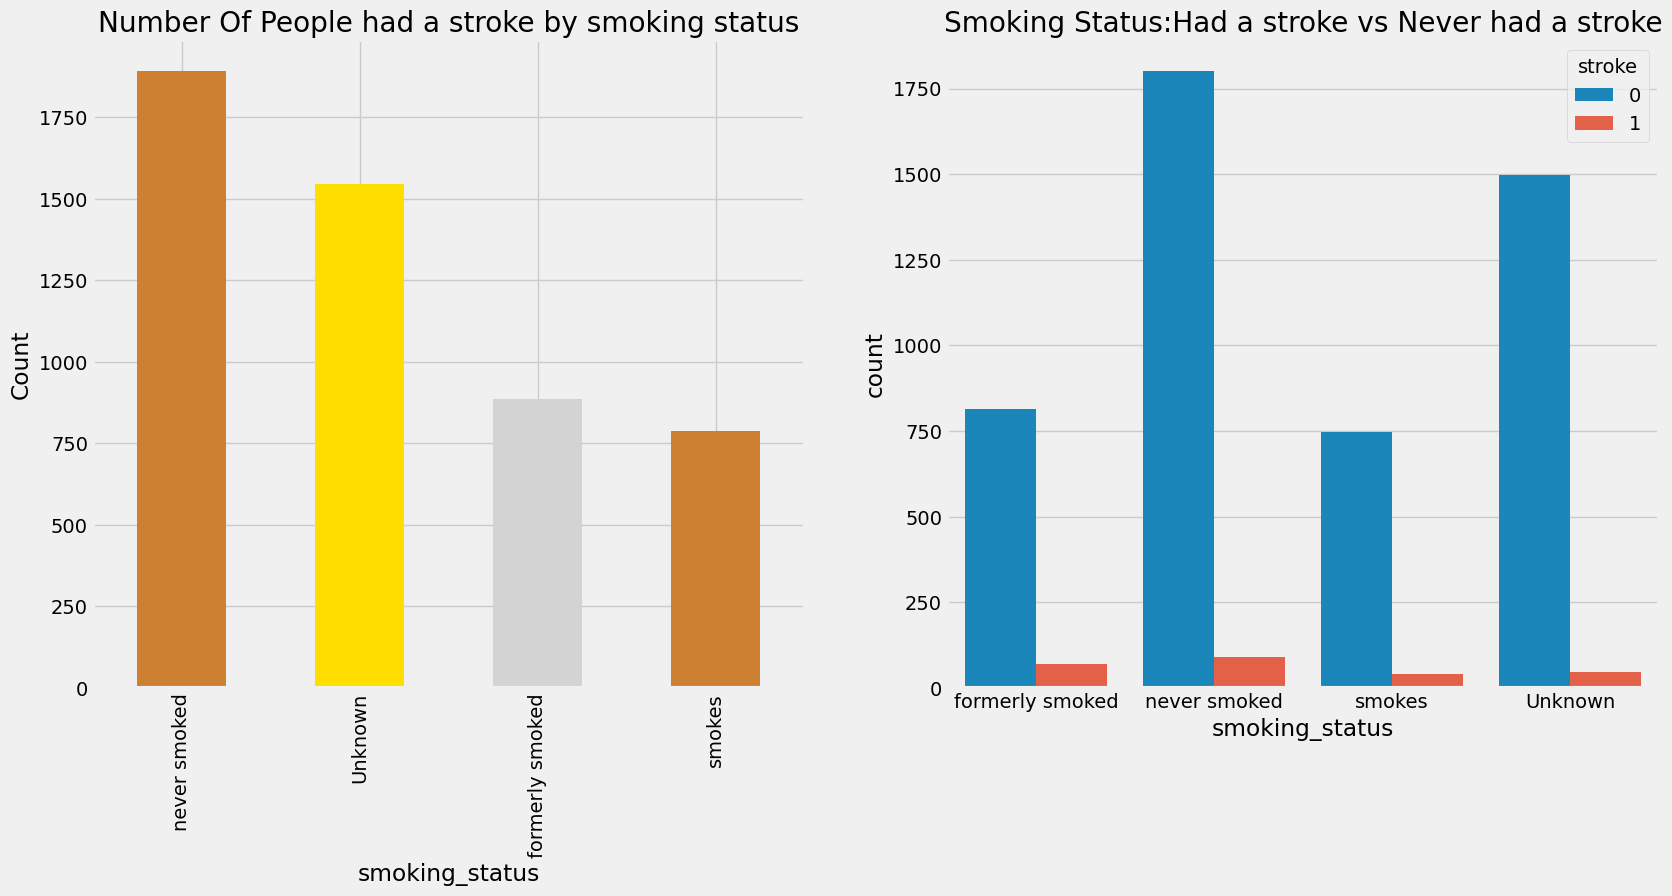

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['smoking_status'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People had a stroke by smoking status')
ax[0].set_ylabel('Count')
sns.countplot(x='smoking_status',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('Smoking Status:Had a stroke vs Never had a stroke')
plt.show()

In [20]:
pd.crosstab([data.gender,data.stroke], data.smoking_status
            ,margins=True).style.background_gradient(cmap='summer_r')

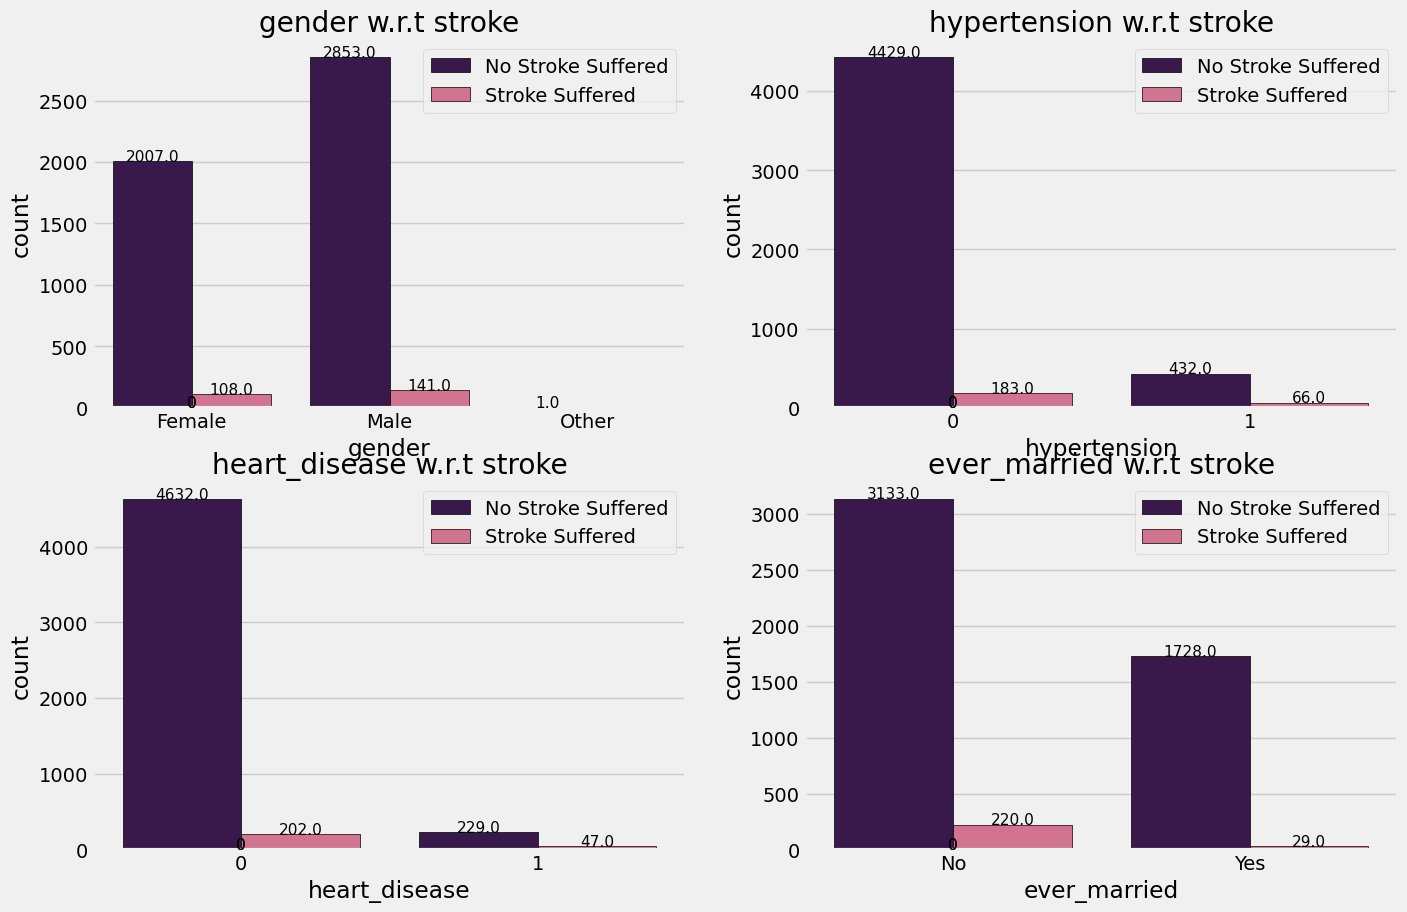

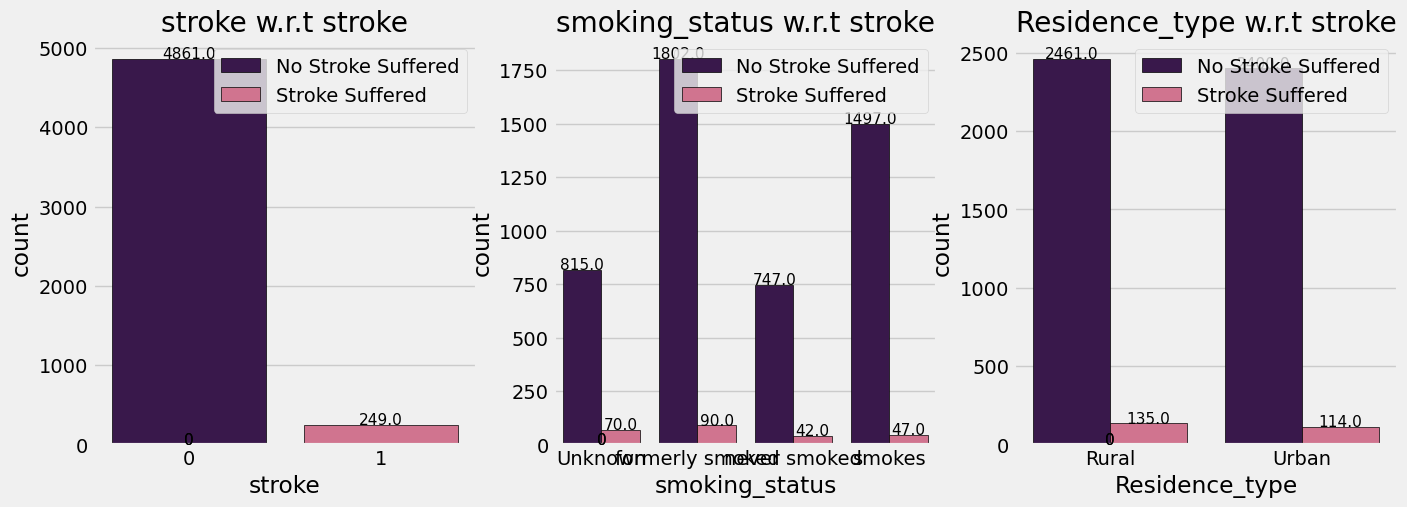

In [21]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x= categorical_features[i],data = data,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(sorted(data[categorical_features[i]].unique()))
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    ax = sns.countplot(x=categorical_features[i],data = data,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(sorted(data[categorical_features[i]].unique()))
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

All the graphs near about share the same pattern i.e displaying low number of stroke cases and no clear cut reason to point towards.

Female population has recorded more cases of stroke than male.

Interestingly, people with no hypertension & no heart disease have displayed to be more prone to suffering stroke than people that have these medical conditions.

According to the dataset, people that have been married have suffered stroke more than those people who have never married.

When it comes to smoking_status, people that have never smoked have topped the numbers with formerly smoked people coming at the 2nd position to record stroke cases.

Not much info can be gained from Residence_type & work_type, however Private workers suffered stroke cases more than any other worker.

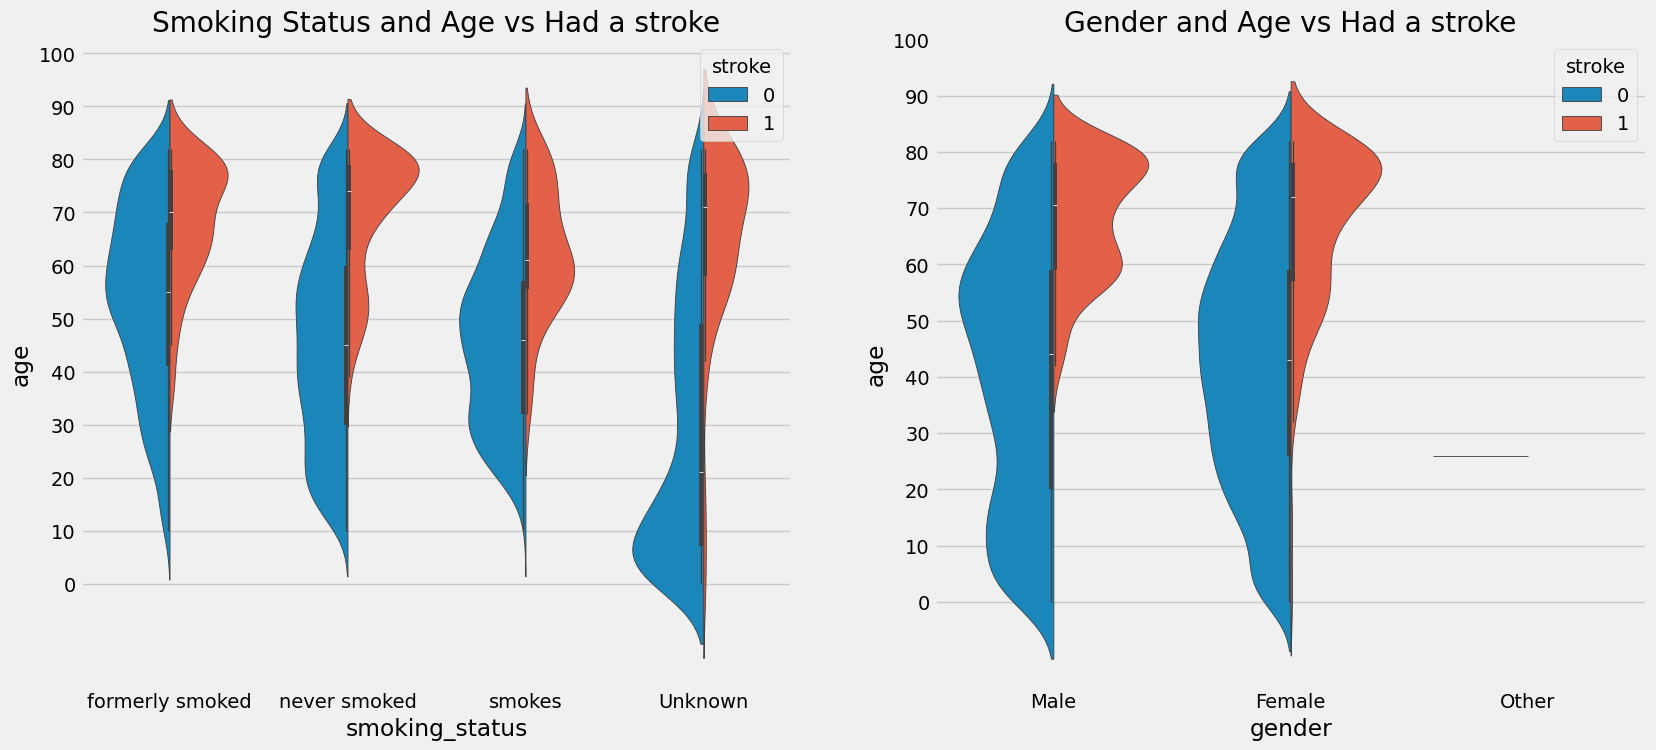

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="smoking_status",y="age", hue="stroke", data=data,split=True,ax=ax[0])
ax[0].set_title('Smoking Status and Age vs Had a stroke')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="gender",y="age", hue="stroke", data=data,split=True,ax=ax[1])
ax[1].set_title('Gender and Age vs Had a stroke')
ax[1].set_yticks(range(0,110,10))
plt.show()

it can be seen that if the age increases,
the chance of having stroke increases too.
For both features smoking_status and gender above 40 years old people have a high chance of having a stroke. 
It seems like most people had a stroke at the age of 80.

In [23]:
print('Maximum "Average Glucose Level" in data:',data['avg_glucose_level'].max())
print('Minimum "Average Glucose Level" in data:',data['avg_glucose_level'].min())
print('Average "Average Glucose Level" in data:',data['avg_glucose_level'].mean())
print("***************************************")
print('Maximum "BMI" in data:',data['bmi'].max())
print('Minimum "BMI" in data:',data['bmi'].min())
print('Average "BMI" in data:',data['bmi'].mean())

Maximum "Average Glucose Level" in data: 271.74
Minimum "Average Glucose Level" in data: 55.12
Average "Average Glucose Level" in data: 106.1476771037182
***************************************
Maximum "BMI" in data: 97.6
Minimum "BMI" in data: 10.3
Average "BMI" in data: 28.893236911794663


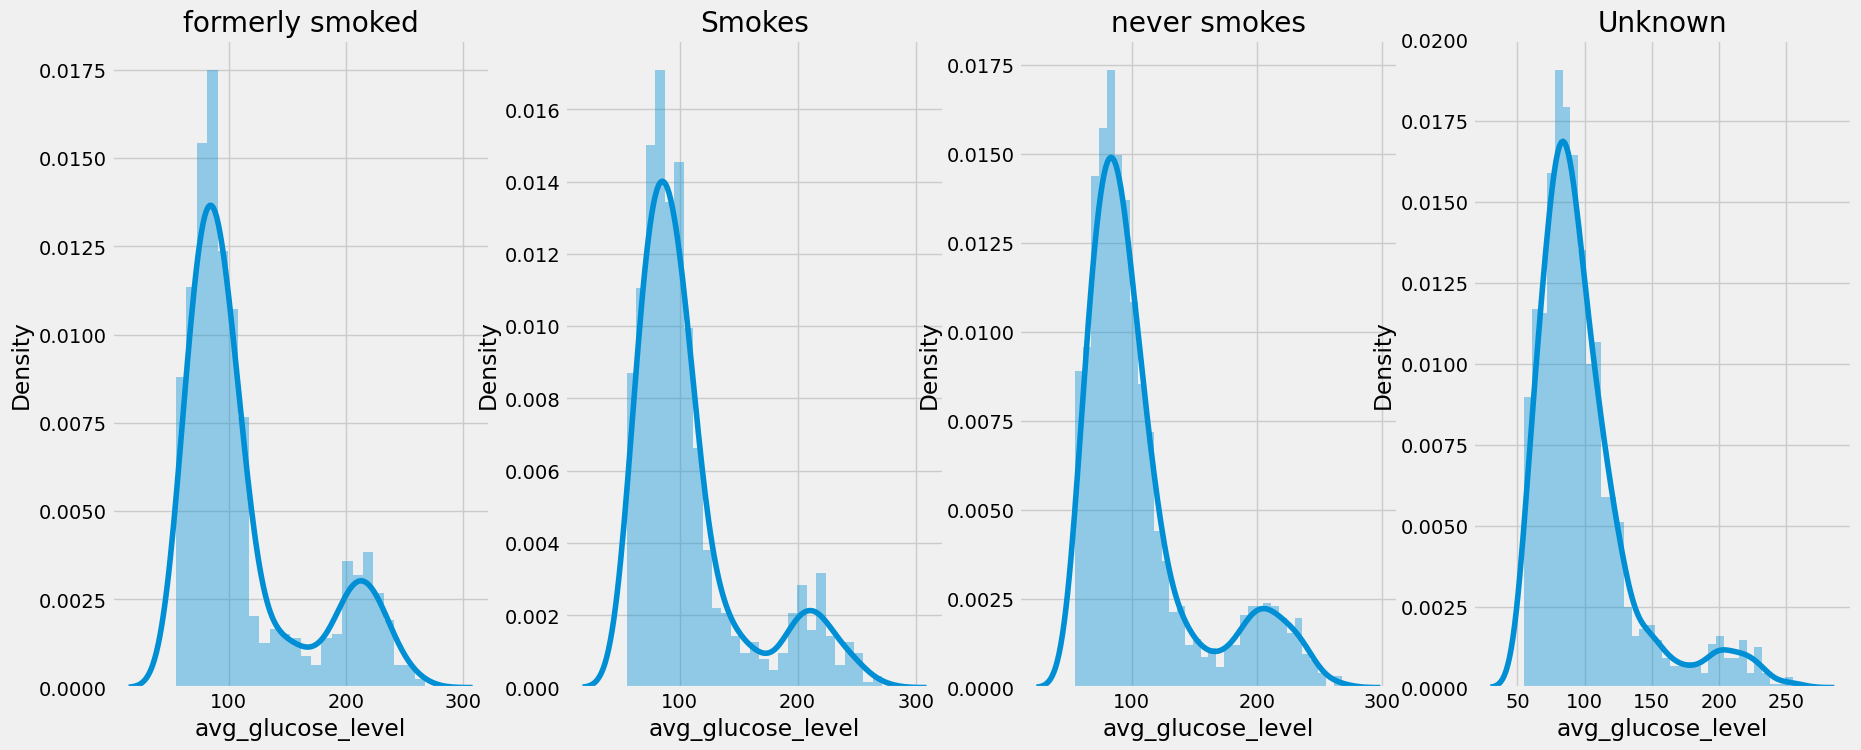

In [24]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(data[data['smoking_status']=="formerly smoked"].avg_glucose_level,ax=ax[0])
ax[0].set_title('formerly smoked')
sns.distplot(data[data['smoking_status']=="smokes"].avg_glucose_level,ax=ax[1])
ax[1].set_title('Smokes')
sns.distplot(data[data['smoking_status']== "never smoked"].avg_glucose_level,ax=ax[2])
ax[2].set_title('never smokes')
sns.distplot(data[data['smoking_status']== "Unknown"].avg_glucose_level,ax=ax[3])
ax[3].set_title('Unknown')
plt.show()

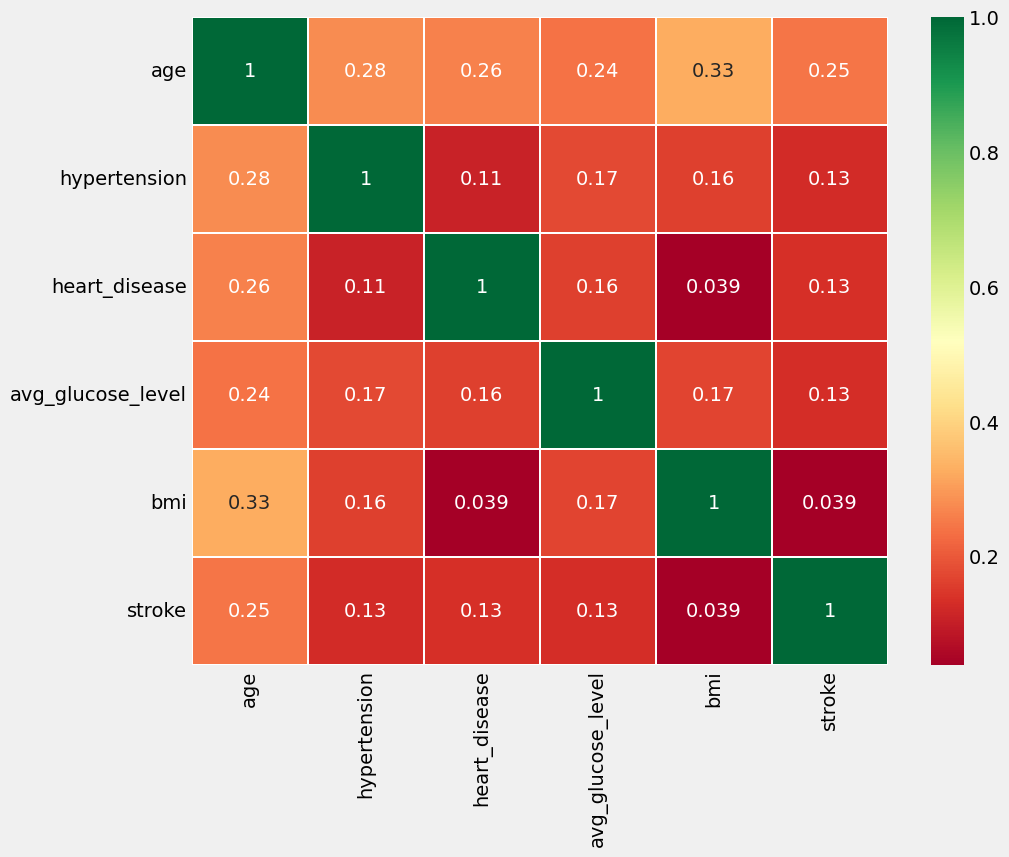

In [25]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

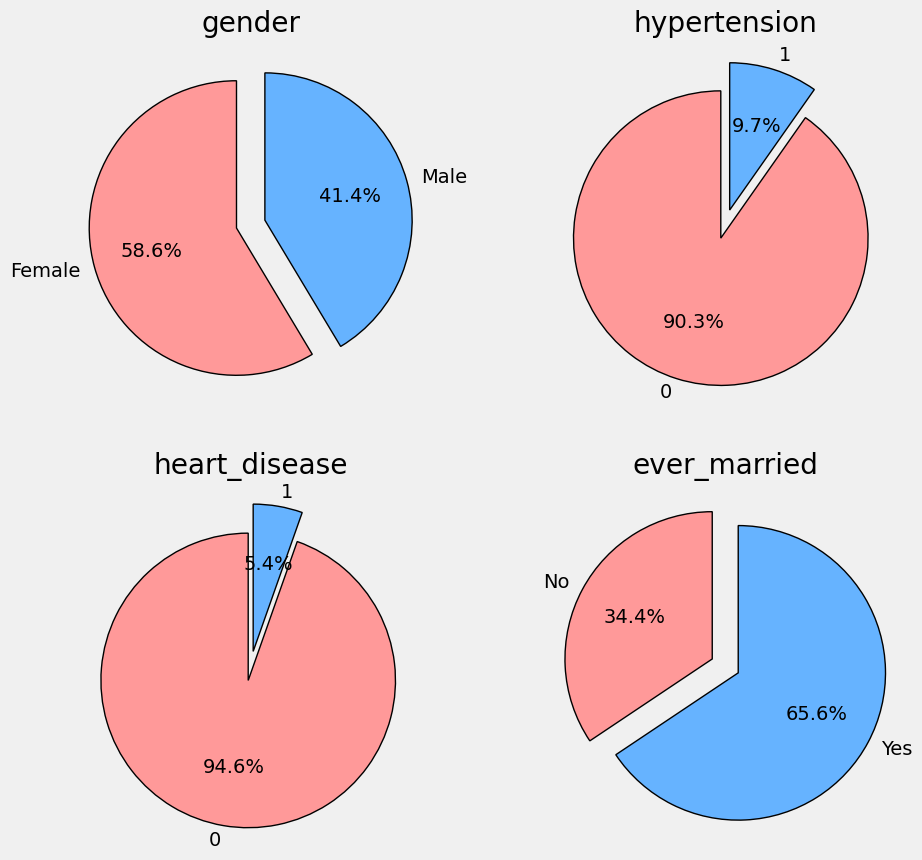

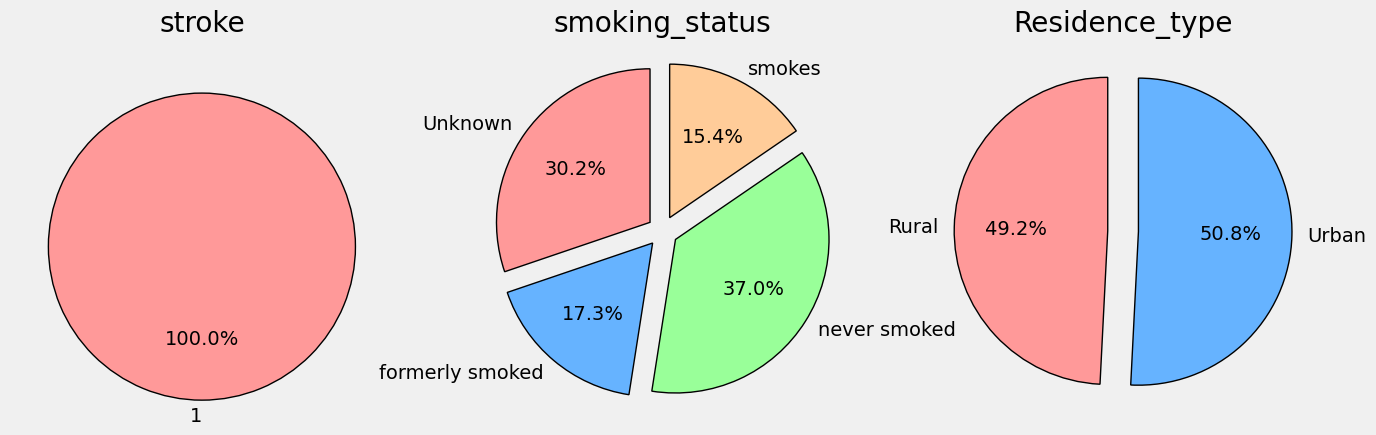

In [26]:

# Define the list of categorical features and associated data

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Define colors for the pie charts

# Create subplots for the first set of pie charts
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))  # Fix ordering: fig first, then ax
for i in range(4):
    plt.subplot(2, 2, i + 1)
    
    # Prepare labels for the pie chart directly from the data
    unique_values = sorted(data[data['stroke'] == 1][categorical_features[i]].unique())
    labels = [str(j) for j in unique_values]  # Convert values to strings if necessary
    
    # Generate the data to be plotted, ensuring its length matches the labels
    data_counts = [sum(data[categorical_features[i]] == j) for j in unique_values]
    
    # Determine explode based on the number of unique values
    explode = (0.1,) * len(unique_values)  # Explode will match the length of unique values
    
    # Plot the pie chart
    plt.pie(
        data_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,  # Explode list dynamically matches the length of data_counts
        colors=colors[:len(unique_values)],  # Adjust color list dynamically
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
    )
    
    plt.title(categorical_features[i])

# Create subplots for the second set of pie charts
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
for i in range(-1, -4, -1):
    plt.subplot(1, 3, -i)
    
    # Prepare labels for the pie chart directly from the data
    unique_values = sorted(data[data['stroke'] == 1][categorical_features[i]].unique())
    labels = [str(j) for j in unique_values]  # Convert values to strings if necessary
    
    # Generate the data to be plotted, ensuring its length matches the labels
    data_counts = [sum(data[categorical_features[i]] == j) for j in unique_values]
    
    # Determine explode based on the number of unique values
    explode = (0.1,) * len(unique_values)  # Explode will match the length of unique values
    
    # Plot the pie chart
    plt.pie(
        data_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,  # Explode list dynamically matches the length of data_counts
        colors=colors[:len(unique_values)],  # Adjust color list dynamically
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
    )
    
    plt.title(categorical_features[i])


According to the data, female population is more susceptible to suffering stroke.

From the above visuals, surprisingly, stroke cases were found more in patients that did not have any medical conditions like heart_disease or hypertension!

People that have been married have the highest probability of suffering from stroke.

When it comes to stroke & smoking_status, people that have never smoked are most susceptible. They are followed by formerly smoked. Surprisingly, people that smokes have the lowest chances of suffering from stroke.

People living in Urban Residence Type have edged the people living in Rural Residence Type in terms of stroke cases.

When it comes to work_type, people working in Private have recorded more than 50%+ of stroke cases. It is followed by Self-employed & Govt_job that record half and quarter of the cases that Private recorderd respectively

<Axes: >

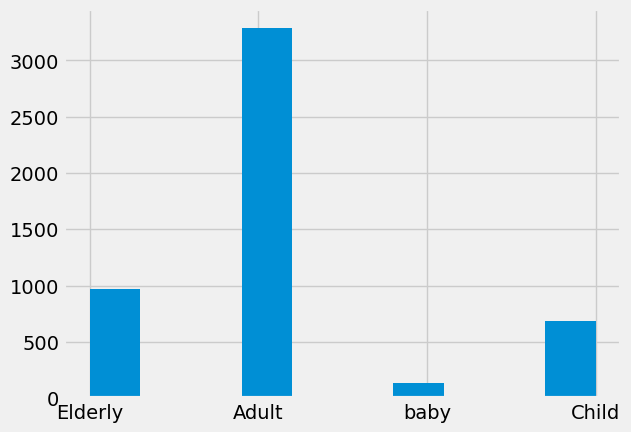

In [27]:
cat = pd.cut(data.age, bins=[0,2,17,65,99], labels= ['baby','Child','Adult','Elderly'])
data.insert(2,'age_group',cat)
data['age_group'].hist()

In [28]:
data['age_group'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
age_group,
Adult,3289
Elderly,965
Child,681
baby,132


In [29]:
from sklearn.preprocessing import LabelEncoder
lab_encode = LabelEncoder()
data['age_group'] = lab_encode.fit_transform(data['age_group'])
data.head()

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,2,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80,2,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,2,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object': 
        data[col] = label_encoder.fit_transform(data[col])

        
print(data.head())

   gender  age  age_group  hypertension  heart_disease  ever_married  \
0       1   67          2             0              1             1   
1       0   61          0             0              0             1   
2       1   80          2             0              1             1   
3       0   49          0             0              0             1   
4       0   79          2             1              0             1   

   work_type  Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0          2               1             228.69 36.60               1       1  
1          3               0             202.21 28.89               2       1  
2          2               0             105.92 32.50               2       1  
3          2               1             171.23 34.40               3       1  
4          3               0             174.12 24.00               2       1  


In [31]:
data.head()

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,2,0,1,1,2,1,228.69,36.60,1,1
1,0,61,0,0,0,1,3,0,202.21,28.89,2,1
2,1,80,2,0,1,1,2,0,105.92,32.50,2,1
3,0,49,0,0,0,1,2,1,171.23,34.40,3,1
4,0,79,2,1,0,1,3,0,174.12,24.00,2,1


The dataset is Unbalanced with a bias towards No Stroke in a ratio of 19 : 1 for No Stroke: 

Stroke. We will first balance the dataset using SMOTE Analysis!

In order to cope with unbalanced data, there are 2 options :

Undersampling : Trim down the majority samples of the target variable.

Oversampling : Increase the minority samples of the target variable to the majority samples.

For best performances, combination of undersampling and oversampling is recommended.

First, we will undersample the majority samples and it is followed by oversampling minority samples.

For data balancing, we will use imblearn.
PIP statement : pip install imbalanced-learn

In [32]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [33]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = data.loc[:,:'smoking_status']
t1 = data.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

over: An instance of SMOTE with a sampling_strategy of 1. This parameter ensures that the number of samples in the minority class will match the number of samples in the majority class. In other words, it will balance the classes to have equal representation.

under: An instance of RandomUnderSampler with a sampling_strategy of 0.1. This means the majority class will be reduced to have 10% of the total number of samples compared to the minority class. It's an approach to reduce the imbalance by randomly removing samples from the majority class.

f1: This selects all columns from the DataFrame df1 up to and including 'smoking_status'. It represents the feature set (independent variables) used for training the model.
t1: This selects the 'stroke' column from df1. It represents the target variable (dependent variable), which indicates whether a stroke occurred (the variable of interest for prediction).

steps: This is a list of tuples, where each tuple consists of a name for the step and the actual resampling object. Here, ('under', under) applies random under-sampling first, followed by ('over', over) applying SMOTE to oversample the minority class.
pipeline: This creates a pipeline object using Pipeline(steps=steps), which will execute the resampling steps in the specified order: under-sampling first, then over-sampling. This sequence helps in reducing overfitting and creating a more balanced training dataset.

This code uses a combination of under-sampling and over-sampling techniques to handle class imbalance in a dataset. The approach first reduces the number of samples in the majority class and then increases the number of samples in the minority class to achieve a more balanced distribution. The use of a pipeline ensures that these operations are applied in sequence, making the process more organized and easier to maintain.

Here, we balance the data by reducing the majority group samples & then increasing the minority group to majority group.

For imbalanced datasets, we duplicate the data to deal with the potential bias in the predictions

.
Due to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class valu
e.
Thus, evaluating models using accuracy will be misleading. Instead, we will go for confusion matrix, ROC-AUC graph and ROC-AUC score for model evaluation.

In [35]:
f1.head()

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,0,4,0,0,0,4,1,57.09,19.40,0
1,1,11,1,0,0,0,4,1,141.84,23.30,0
2,1,13,1,0,0,0,4,1,82.38,24.30,0
3,1,32,0,0,0,1,0,0,83.01,25.80,3
4,1,57,0,0,1,1,3,1,92.82,27.80,1


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train


In [46]:
x_train

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1815,1,59,0,0,0,1,2,1,117.92,29.40,3
307,1,62,0,0,0,1,2,0,62.56,32.30,2
4974,1,74,2,0,0,1,1,0,220.63,26.98,2
2937,0,53,0,0,0,1,1,1,62.77,31.81,0
2637,0,78,2,0,0,1,2,1,67.29,24.60,2
...,...,...,...,...,...,...,...,...,...,...,...
3335,0,72,2,0,0,0,2,0,88.49,28.89,0
1099,0,23,0,0,0,0,2,0,92.87,30.10,2
2514,1,71,2,0,0,1,2,1,102.87,27.20,1
3606,1,78,2,0,0,1,2,1,238.74,28.10,1


In [45]:
x_train_test

,gender,age,age_group,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1815,1,59,0,0,0,1,2,1,117.92,29.40,3,0
307,1,62,0,0,0,1,2,0,62.56,32.30,2,0
4974,1,74,2,0,0,1,1,0,220.63,26.98,2,1
2937,0,53,0,0,0,1,1,1,62.77,31.81,0,1
2637,0,78,2,0,0,1,2,1,67.29,24.60,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3335,0,72,2,0,0,0,2,0,88.49,28.89,0,1
1099,0,23,0,0,0,0,2,0,92.87,30.10,2,0
2514,1,71,2,0,0,1,2,1,102.87,27.20,1,1
3606,1,78,2,0,0,1,2,1,238.74,28.10,1,1


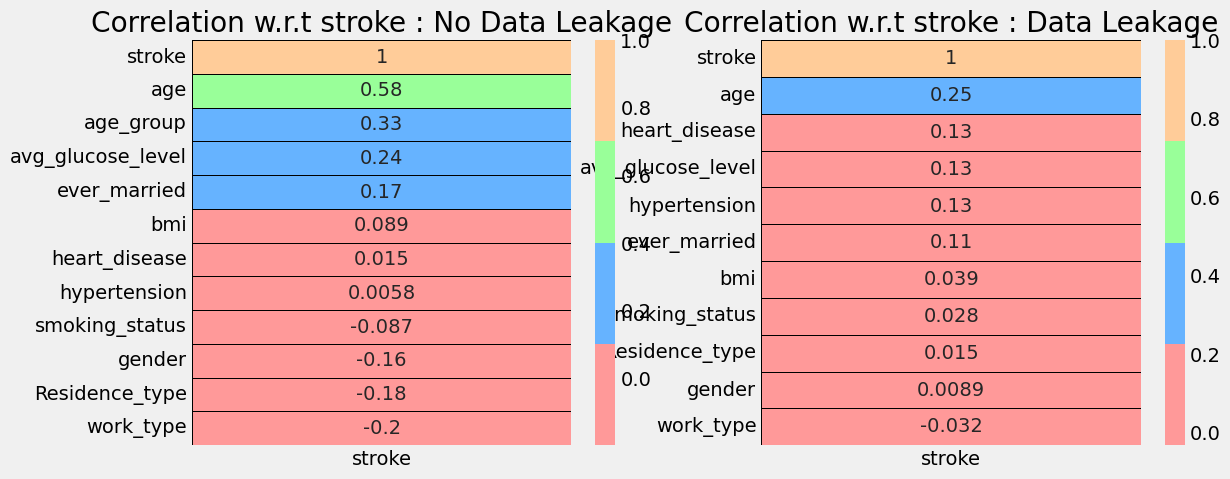

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
corr = x_train_test.corrwith(x_train_test['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke : No Data Leakage');

plt.subplot(1,2,2)
corr = df1.drop(columns = ['age_group', 'avg_glucose_level_group', 'bmi_group']).corrwith(df1['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke : Data Leakage');

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(x_train,y_train)
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(x_train.columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,2128.62
2,age_group,501.48
8,avg_glucose_level,262.93
6,work_type,171.62
7,Residence_type,145.11
5,ever_married,121.28
0,gender,116.42
9,bmi,33.75
10,smoking_status,31.98
4,heart_disease,0.92


In [48]:
x_train = x_train.drop(columns = ['smoking_status', 'heart_disease', 'hypertension', 'bmi'])
x_test = x_test.drop(columns = ['smoking_status', 'heart_disease', 'hypertension', 'bmi'])

In [51]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
x_train['age'] = mms.fit_transform(x_train[['age']])
x_test['age'] = mms.transform(x_test[['age']])
x_train['avg_glucose_level'] = mms.fit_transform(x_train[['avg_glucose_level']])
x_test['avg_glucose_level'] = mms.transform(x_test[['avg_glucose_level']])

# Standardization
x_train['gender'] = ss.fit_transform(x_train[['gender']]);
x_test['gender'] = ss.transform(x_test[['gender']])
x_train['ever_married'] = ss.fit_transform(x_train[['ever_married']]);
x_test['ever_married'] = ss.transform(x_test[['ever_married']])
x_train['work_type'] = ss.fit_transform(x_train[['work_type']]);
x_test['work_type'] = ss.transform(x_test[['work_type']])
x_train['Residence_type'] = ss.fit_transform(x_train[['Residence_type']]);
x_test['Residence_type'] = ss.transform(x_test[['Residence_type']])

In [75]:
 #for confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [76]:
x_train1, x_test1, y_train1, y_test1 = x_train.values, x_test.values, y_train.values, y_test.values


In [80]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [81]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  90.81%
ROC_AUC Score :  83.23%


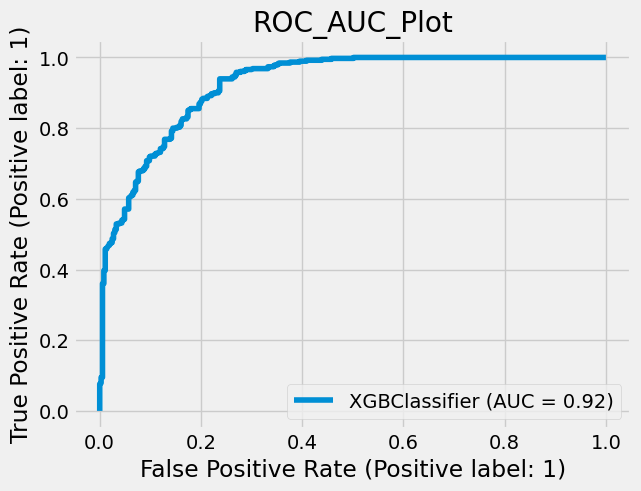

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       367
           1       0.82      0.86      0.84       380

    accuracy                           0.83       747
   macro avg       0.83      0.83      0.83       747
weighted avg       0.83      0.83      0.83       747



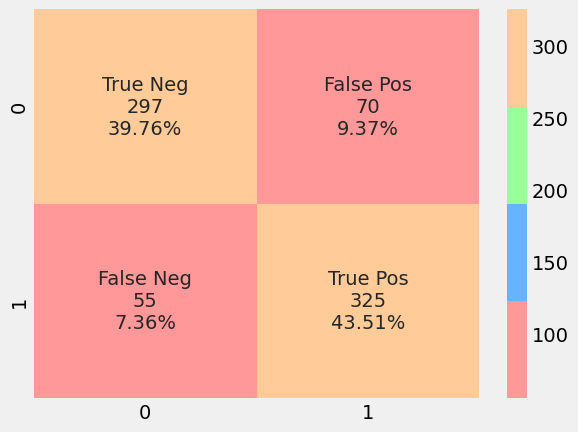

In [82]:
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)